# Initial Model Report

---

**PROJECT GOAL:** Can a web users’ purchase intensions be predicted through their browsing behaviors?

In [1]:
import pandas as pd
import numpy as np

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

plt.style.use('seaborn')
pd.set_option('display.width', 200)
pd.set_option('display.max_colwidth', 20)
pd.set_option('display.max_rows', 100)
from IPython.display import display, Markdown, Latex


In [2]:
#Install all dependencies needed by running the code below.
%run ./system_check.ipynb

Requirement already up-to-date: imbalanced-learn in /home/jupyter-falenezy/.local/lib/python3.6/site-packages (0.6.2)


In [3]:

#reading the dataset
df = pd.read_csv('./data/online_shoppers_intention.csv')
df.head().T

,0,1,2,3,4
Administrative,0,0,0,0,0
Administrative_Duration,0,0,0,0,0
Informational,0,0,0,0,0
Informational_Duration,0,0,0,0,0
ProductRelated,1,2,1,2,10
ProductRelated_Duration,0,64,0,2.66667,627.5
BounceRates,0.2,0,0.2,0.05,0.02
ExitRates,0.2,0.1,0.2,0.14,0.05
PageValues,0,0,0,0,0
SpecialDay,0,0,0,0,0


---

## Data Dictionary 

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-cly1{text-align:left;vertical-align:middle}
.tg .tg-1wig{font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-wa1i{font-weight:bold;text-align:center;vertical-align:middle}
.tg .tg-yla0{font-weight:bold;text-align:left;vertical-align:middle}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg" style="undefined;table-layout: fixed; width: 841px">
<colgroup>
<col style="width: 161px">
<col style="width: 541px">
<col style="width: 139px">
</colgroup>
  <tr>
    <th class="tg-wa1i">Feature name</th>
    <th class="tg-wa1i"> Feature description</th>
    <th class="tg-wa1i">Data Type</th>
  </tr>
  <tr>
    <td class="tg-cly1">Administrative</td>
    <td class="tg-cly1">Number of pages visited by the visitor about account management</td>
    <td class="tg-yla0">Continuous/Float</td>
  </tr>
  <tr>
    <td class="tg-cly1">Administrative duration</td>
    <td class="tg-cly1">Total amount of time (in seconds) spent by the visitor on account management related pages</td>
    <td class="tg-yla0">Continuous/Float</td>
  </tr>
  <tr>
    <td class="tg-0lax">Informational</td>
    <td class="tg-0lax">Number of pages visited by the visitor about Web site, communication and address information of the shopping site</td>
    <td class="tg-1wig">Continuous/Integer</td>
  </tr>
  <tr>
    <td class="tg-0lax">Informational duration</td>
    <td class="tg-0lax">Total amount of time (in seconds) spent by the visitor on informational pages</td>
    <td class="tg-1wig">Continuous/Float</td>
  </tr>
  <tr>
    <td class="tg-0lax">Product related </td>
    <td class="tg-0lax">Number of pages visited by visitor about product related pages </td>
    <td class="tg-1wig">Continuous/Integer</td>
  </tr>
  <tr>
    <td class="tg-0lax">Product related duration</td>
    <td class="tg-0lax">Total amount of time (in seconds) spent by the visitor on product related pages</td>
    <td class="tg-1wig">Continuous/Float</td>
  </tr>
  <tr>
    <td class="tg-0lax">Bounce rate</td>
    <td class="tg-0lax"> Average bounce rate value of the pages visited by the visitor</td>
    <td class="tg-1wig">Continuous/Float</td>
  </tr>
  <tr>
    <td class="tg-0lax">Exit rate</td>
    <td class="tg-0lax"> Average exit rate value of the pages visited by the visitor</td>
    <td class="tg-1wig">Continuous/Float</td>
  </tr>
  <tr>
    <td class="tg-0lax">Page value</td>
    <td class="tg-0lax"> Average page value of the pages visited by the visitor</td>
    <td class="tg-1wig">Continuous/Float</td>
  </tr>
  <tr>
    <td class="tg-0lax">Special day </td>
    <td class="tg-0lax">Closeness of the site visiting time to a special day</td>
    <td class="tg-1wig">Continuous/Float</td>
  </tr>
  <tr>
    <td class="tg-0lax">OperatingSystems </td>
    <td class="tg-0lax">Operating system of the visitor</td>
    <td class="tg-1wig">Continuous/Float</td>
  </tr>
  <tr>
    <td class="tg-0lax">Browser</td>
    <td class="tg-0lax"> Browser of the visitor</td>
    <td class="tg-1wig">Categorical/Integer</td>
  </tr>
  <tr>
    <td class="tg-0lax">Region </td>
    <td class="tg-0lax">Geographic region from which the session has been started by the visitor </td>
    <td class="tg-1wig">Categorical/Integer</td>
  </tr>
  <tr>
    <td class="tg-0lax">TrafficType</td>
    <td class="tg-0lax"> Traffic source by which the visitor has arrived at the Web site (e.g., banner, SMS, direct)</td>
    <td class="tg-1wig">Categorical/Integer</td>
  </tr>
  <tr>
    <td class="tg-0lax">VisitorType</td>
    <td class="tg-0lax"> Visitor type as ‘‘New Visitor,’’ ‘‘Returning Visitor,’’ and ‘‘Other’’ </td>
    <td class="tg-1wig">Categorical/Integer</td>
  </tr>
  <tr>
    <td class="tg-0lax">Weekend</td>
    <td class="tg-0lax"> Boolean value indicating whether the date of the visit is weekend</td>
    <td class="tg-1wig">Binary/Boolean</td>
  </tr>
  <tr>
    <td class="tg-0lax">Month </td>
    <td class="tg-0lax">Month value of the visit date</td>
    <td class="tg-1wig">Date/Text</td>
  </tr>
  <tr>
    <td class="tg-0lax">Revenue</td>
    <td class="tg-0lax"> Class label indicating whether the visit has been finalized with a transaction</td>
    <td class="tg-1wig">Binary/Boolean</td>
  </tr>
</table>

Sakar, Cemal Okan et al. “Real-time prediction of online shoppers’ purchasing intention using multilayer perceptron and LSTM recurrent neural networks.” Neural Computing and Applications 31 (2018): 6893-6908.

----

# Exploratory Data Analysis

In [4]:
#Checking For data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [5]:
display(Markdown("**The number of columns in the dataset is: {}**".format(df.shape[1])))

display(Markdown("**The number of rows in the dataset is: {}**".format(df.shape[0])))


**The number of columns in the dataset is: 18**

**The number of rows in the dataset is: 12330**

### Checking For Missing Values

In [6]:
display(Markdown("**The number of missing values in the dataset is: {}**".format(df.isna().sum().sum())))


**The number of missing values in the dataset is: 0**

---

## Making Sense of the Data

Early understanding of the data is critical in regards to model interpretation. The original dataset contained 18 columns and 12330 rows. The target variable, "Revenue" was heavily skewed, with only 15.5% of web users making a purchase during that visit. 

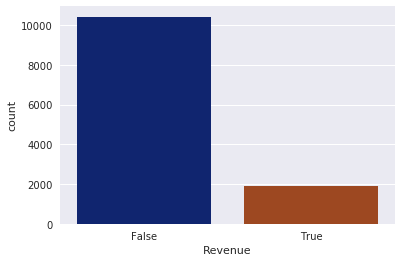

In [7]:
sns.countplot(df['Revenue'], palette='dark')
plt.show()

After observing the target variable, we dove into specific variables to observe how the distribution of each may affect our models.
For instance, the website was visited far more frequently during the week (M-F) and by returning visitors. It was also noteable that "region 1" was by far the most popular location for visitors.

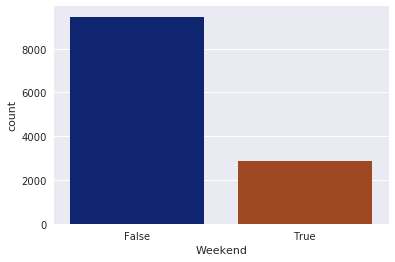

In [8]:
sns.countplot(df['Weekend'], palette='dark')
plt.show()

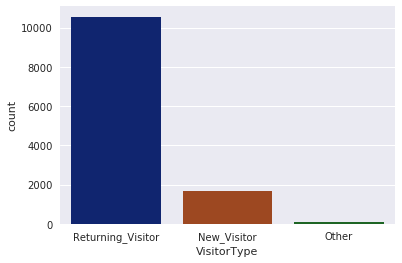

In [9]:
sns.countplot(df['VisitorType'], palette='dark')
plt.show()

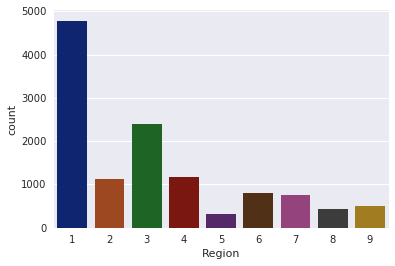

In [10]:
sns.countplot(df['Region'], palette='dark')
plt.show()

We then decided to run crosstab visualizations to see how certain variables compared to the target value.

It was determined that most of the website's purchases (as well as non-purchasing visits) occured in November, followed closely by May and March. This was interpreted as sales revolving around holiday times. This idea is plausable due to the high non-purchase rate in December, which could be caused by customers visiting the site to browse for gifts, but not making a purchase. Similarly, the website's highest reported Bounce and ExitRates also occured within those three months.

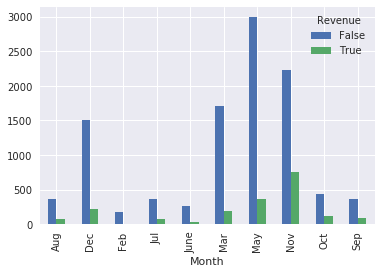

In [11]:
pd.crosstab(df['Month'],df['Revenue']).plot.bar()
plt.show()

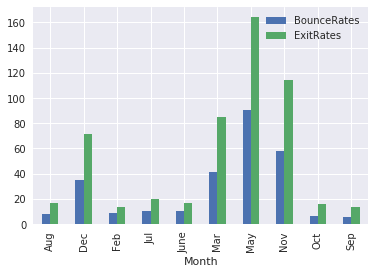

In [12]:
df.groupby(['Month'])['BounceRates','ExitRates'].sum().plot(kind ="bar")
plt.show()

We also noted that returning_visitors had the highest rate of non-purchases out of all the visitors. This could be explained by returning customers checking the site periodically to check for sales or specific prices. While new visitors also had a higher rate of non-purchasing, it could be inferred that as a new customer, they were referred to or sought out the website to find a specific product, not to casually browse for deals.

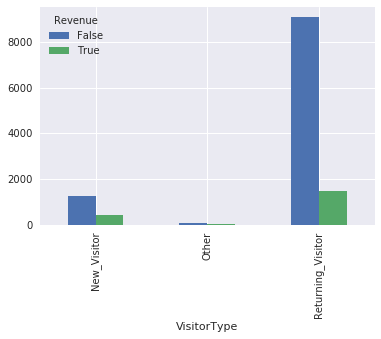

In [13]:
pd.crosstab(df['VisitorType'],df['Revenue']).plot.bar()
plt.show()

After observing the high occurance of region_1, we decided to see if this website's revenue also heavily flowed from the same region. However, while region_1 is more profitable than the others, it also supported the highest rate of non-purchasing visits, approximately double the amount as the second most popular region, region_3. We observed a similar pattern when grouping by Bounce and Exit Rates, with region_1 leading in both accounts.

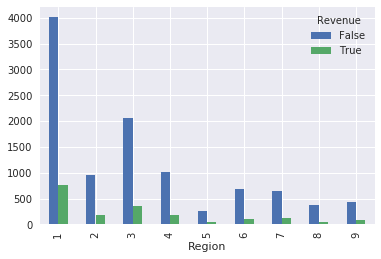

In [14]:
pd.crosstab(df['Region'],df['Revenue']).plot.bar()
plt.show()

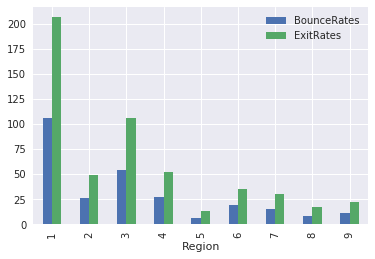

In [15]:
df.groupby(['Region'])['BounceRates','ExitRates'].sum().plot(kind ="bar")
plt.show()

Finally, we wanted to measure Bounce and ExitRates against our target feature. It appears that even visitors that make a purchase on the site experience a moderate ExitRate. This could be attributed to the 

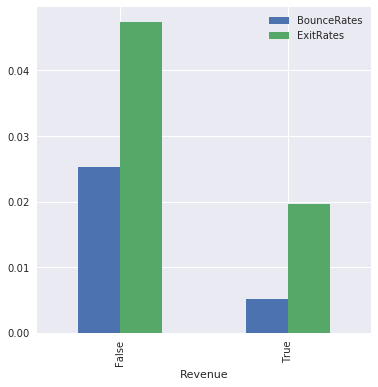

In [16]:
(df.groupby(["Revenue"])['BounceRates','ExitRates'].agg('mean')).plot.bar(figsize = (6,6))
plt.show()

In [17]:
df.describe().round(5).T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.31517,3.32178,0.0,0.00000,1.00000,4.00000,27.00000
Administrative_Duration,12330.0,80.81861,176.77911,0.0,0.00000,7.50000,93.25625,3398.75000
Informational,12330.0,0.50357,1.27016,0.0,0.00000,0.00000,0.00000,24.00000
Informational_Duration,12330.0,34.47240,140.74929,0.0,0.00000,0.00000,0.00000,2549.37500
ProductRelated,12330.0,31.73147,44.47550,0.0,7.00000,18.00000,38.00000,705.00000
ProductRelated_Duration,12330.0,1194.74622,1913.66929,0.0,184.13750,598.93690,1464.15721,63973.52223
BounceRates,12330.0,0.02219,0.04849,0.0,0.00000,0.00311,0.01681,0.20000
ExitRates,12330.0,0.04307,0.04860,0.0,0.01429,0.02516,0.05000,0.20000
PageValues,12330.0,5.88926,18.56844,0.0,0.00000,0.00000,0.00000,361.76374
SpecialDay,12330.0,0.06143,0.19892,0.0,0.00000,0.00000,0.00000,1.00000


----

### Correlation

We performed a correlation matrix to see which features had a high correlation with the target, as well as the other features. This will help us in any necessary feature engineering.

### List of correlation pair (Max on top):

,,
BounceRates,ExitRates,0.913004
ProductRelated,ProductRelated_Duration,0.860927
Informational,Informational_Duration,0.618955
Administrative,Administrative_Duration,0.601583


--------------------------

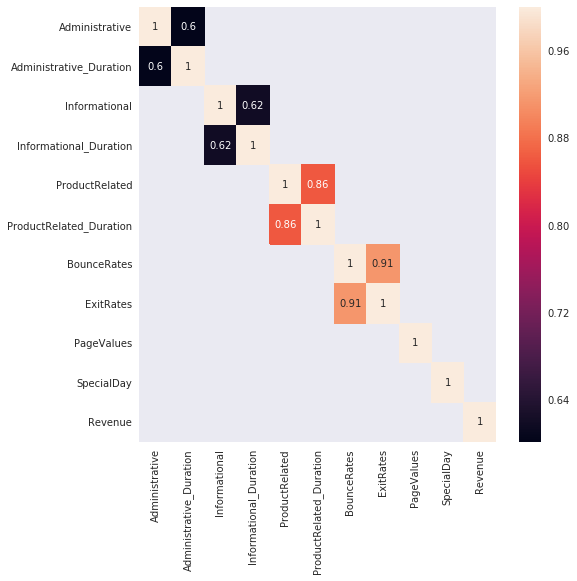

In [18]:
corr_cols =['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
            'Revenue',
           
 ]


# https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
#correlation matrix
corr_matrix = df[corr_cols].corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
corr_list = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
## prints a descending list of correlation pair (Max on top)
display(Markdown("### List of correlation pair (Max on top):"))
display(corr_list[corr_list>= .5].to_frame(""))
display(Markdown("--------------------------"))


corr_df =df[corr_cols].corr().abs()
corr_df = corr_df[corr_df >= .5]           
plt.figure(figsize= (8,8))
corr = corr_df#.round(4)
sns.heatmap(corr, annot=True)
plt.show()

__Based on our correlation matrix, we determined the pairwise of four pairs that required feature engineering. Those pairs have been highlighted in the above matrix:__

- Administrative & Administrative_Duration
- Informational & Informational_Duration
- ProductRelated & ProductRelated_Duration
- BounceRates & ExitRates

---

### Feature Engineering

We then took these pairwise and found the average page duration per second for Administrative, Information and ProductRelated, and the ratio between BounceRates and ExitRates. We felt that using these new features could serve better use in future feature selection processes and eliminate redundant correlating features in our modeling.

In [25]:
df["average_informational_duration"] = df['Informational_Duration']/df['Informational']
df["average_administrative_duration"] = df['Administrative_Duration']/df['Administrative']
df["average_ProductRelated_duration"] = df['ProductRelated_Duration']/df['ProductRelated']
df["average_BounceRates/ExitRates"] = (df["BounceRates"]+df["ExitRates"])/2


display(Markdown("###  Before imputation:"))


display(df[["average_informational_duration" ,"average_administrative_duration" ,"average_ProductRelated_duration" ,"average_BounceRates/ExitRates"]].isna().sum().to_frame("NumberOfMissing"))
#dealing with dividing by zeros
df = df.fillna(0)#dealing with dividing by zeros
print("               ")
#display(Markdown("------"))

display(Markdown("###  After imputation:"))



display(df[["average_informational_duration" ,"average_administrative_duration" ,"average_ProductRelated_duration" ,"average_BounceRates/ExitRates"]].isna().sum().to_frame("NumberOfMissing"))


###  Before imputation:

,NumberOfMissing
average_informational_duration,9699
average_administrative_duration,5768
average_ProductRelated_duration,38
average_BounceRates/ExitRates,0


###  After imputation:

,NumberOfMissing
average_informational_duration,0
average_administrative_duration,0
average_ProductRelated_duration,0
average_BounceRates/ExitRates,0


---


### Encoding

We changed text based features into numeric and/or binary data points such as month, season, etc.

In [20]:

months = {'JAN':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5,
     'June':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10,
     'Nov':11, 'Dec':12}

df['months'] = df.Month.map(months)
df['months'].value_counts()
seasons = ((df['months'] % 12 + 3) // 3).map({1:'winter', 2: 'Spring', 3:'summer', 4:'Fall'})
df["season"]= seasons


In [21]:

dummy = [
 
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
'VisitorType' ,
    'season'
 ]

for i  in dummy:
    df[i+'_dummies'] =df[i]
#list(df.columns)
dummies_cols = [
 'OperatingSystems_dummies',
 'Browser_dummies',
 'Region_dummies',
 'TrafficType_dummies',
 'VisitorType_dummies',
 'season_dummies'
]
df= pd.get_dummies(df, prefix=None, prefix_sep='_', dummy_na=False, columns=dummies_cols,sparse=False, drop_first=False, dtype=None)
df['Weekend_binary'] = df['Weekend'].map({True:1,False:0})
df['Revenue_Y'] = df['Revenue'].map({True:1,False:0})



---

### Determining How to Handle Outliers

Before determing what to do with outliers, we decided to look at a few scatter plots of data to get an idea of the data in relation to PageValues, the driving force leading to revenue. The scatter plots are colored based on if the data point resulted in revenue or not. These two visualizations are two we selected for the purpose of showing two examples, if you would like to referance any more you can look at the Visualization.ipynb file to see more.

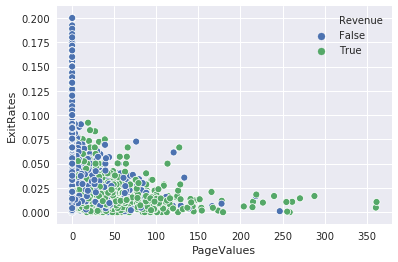

In [22]:
sns.scatterplot(x='PageValues', y='ExitRates', hue = 'Revenue', data=df) 
plt.show()

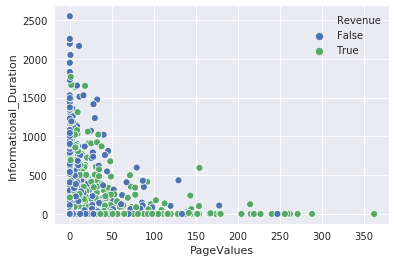

In [23]:
sns.scatterplot(x='PageValues', y='Informational_Duration',hue = 'Revenue', data=df)
plt.show()

When looking at the two example visualziations above, it can be seen that it is the outliers that are causing the skewness in the data. 

You can see specifically wih ExitRates in the first visualization, no revenue accrue with 0 value for PageValue. Because of this, esentially we know that there is a large amount of people that come onto the site, and choose to leave right away. Within the distribution of the data, it will create a skewnewss, however it essentially impacts the results the same way.

In the second visualization, for 0 value PageValues there are no instances of Informational Duration. There are some instances of what apears to be in the low single digits of a higher Information Duration, but for the most part this seems to be the same as the first visualization. Within the distribution of the data, it will create a skewnewss, however it essentially impacts the results the same way.

Rather than dropping these datapoints, we have determined to keep them in the data set to be used in our models because they directly effect the shape of the distribution which is relevant to how we standardize and normalize it.


----

### Handling Skewness


 ------------------------------------------------------

 'PageValues_skew' had 'positive' skewness of 6.38

 Transformation yielded skewness of 1.34


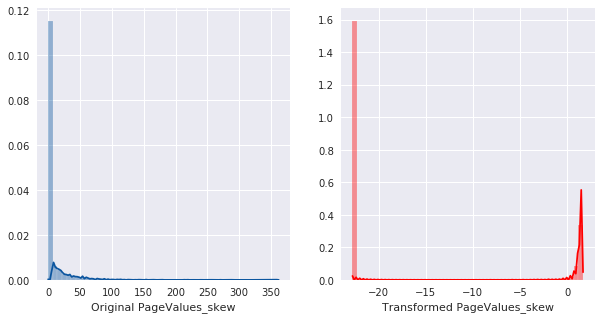


 ------------------------------------------------------

 'Informational_Duration_skew' had 'positive' skewness of 7.58

 Transformation yielded skewness of 1.54


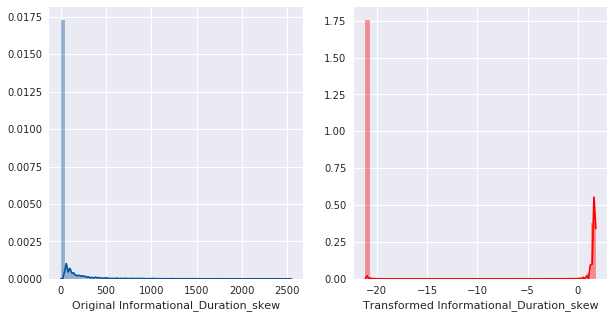


 ------------------------------------------------------

 'average_informational_duration_skew' had 'positive' skewness of 11.22

 Transformation yielded skewness of 1.54


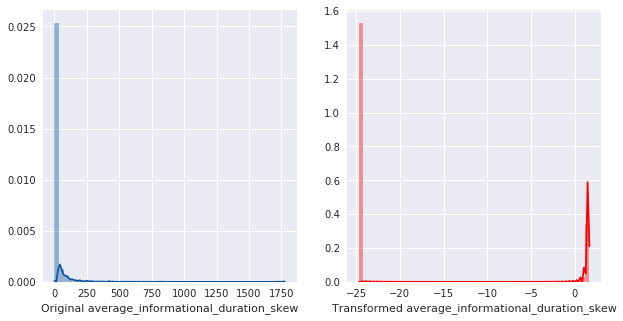


 ------------------------------------------------------

 'average_administrative_duration_skew' had 'positive' skewness of 9.42

 Transformation yielded skewness of -0.00


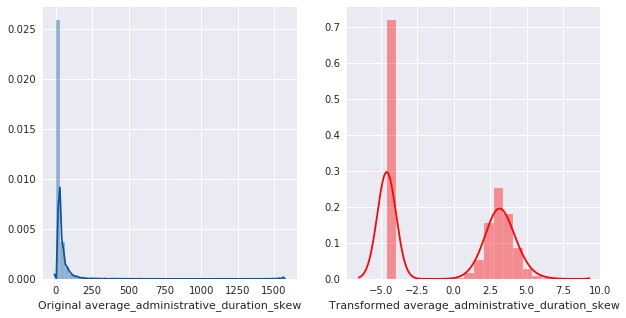


 ------------------------------------------------------

 'average_ProductRelated_duration_skew' had 'positive' skewness of 10.30

 Transformation yielded skewness of 0.21


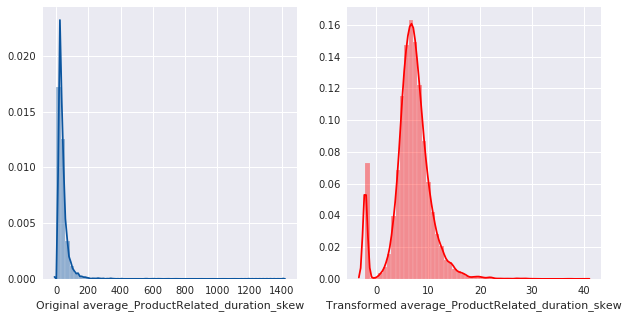


 ------------------------------------------------------

 'average_BounceRates/ExitRates_skew' had 'positive' skewness of 2.66

 Transformation yielded skewness of 0.11


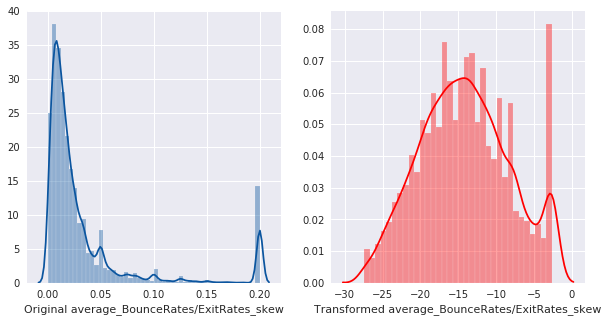

In [27]:
from skew_autotransform import skew_autotransform
skew_cols = [

    'PageValues',
   'Informational_Duration'  , 
    'average_informational_duration',
    'average_administrative_duration',
    'average_ProductRelated_duration', 
    'average_BounceRates/ExitRates'
            ]

 
for i  in skew_cols:

    df[i+'_skew'] = df[i]
    
    
cols_to_skew = [

    'PageValues_skew' ,
 
    'Informational_Duration_skew' ,
                
    'average_informational_duration_skew', 
    'average_administrative_duration_skew',
    'average_ProductRelated_duration_skew',
    'average_BounceRates/ExitRates_skew'
               
               
               
               ]

df = skew_autotransform(df,include = cols_to_skew, plot = True, exp = False, threshold = 0.01)
plt.show()

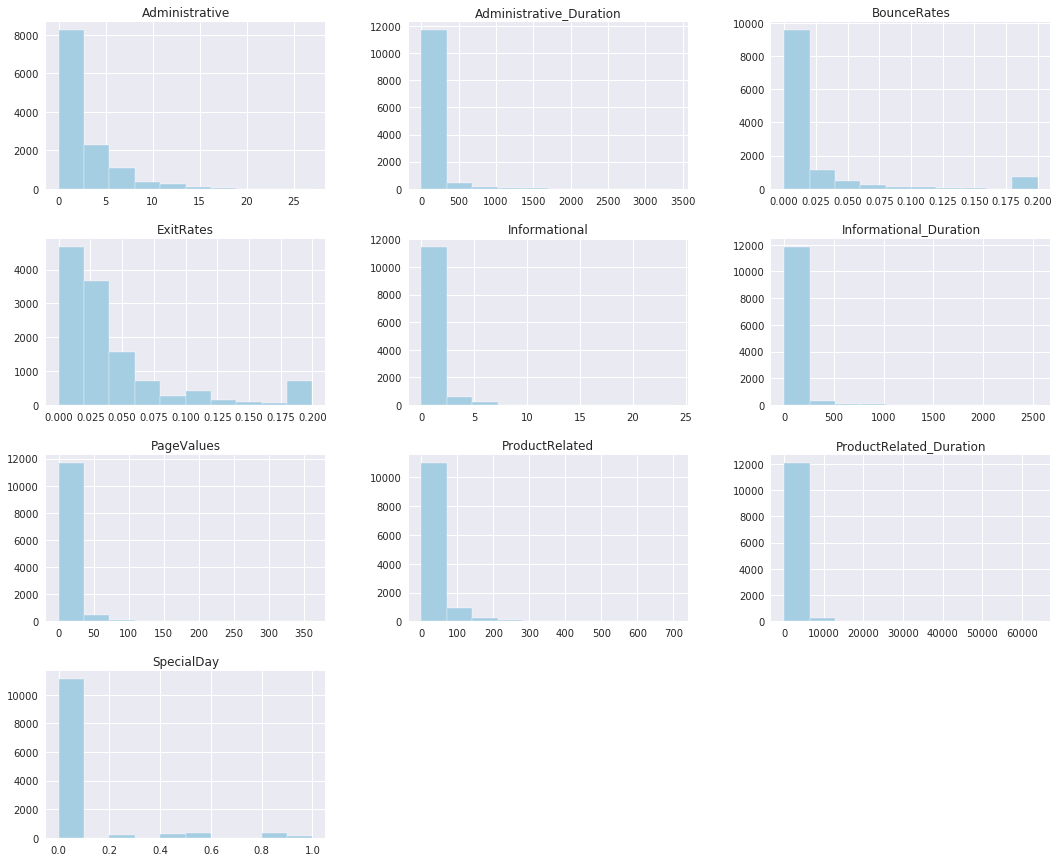

In [28]:
cols =['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
   
 ]


df[cols].hist(figsize =(18,15))
plt.show()

**As can be seen in the above visualizations, there was a tendency for a right skewness in most features prior to Transformation.**

In [34]:
cols_skew = [
'PageValues_skew'  , 'average_informational_duration_skew', 
'average_administrative_duration_skew','average_ProductRelated_duration_skew',
'average_BounceRates/ExitRates_skew']
df[cols_skew].skew().to_frame("")

,
PageValues_skew,1.344268
average_informational_duration_skew,1.539673
average_administrative_duration_skew,-0.003089
average_ProductRelated_duration_skew,0.208625
average_BounceRates/ExitRates_skew,0.114926


### Standardization

We then use MinMaxScaler to apply standardization to the data. 

In [35]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler

min_max_col_pre = [  
        
    'PageValues_skew',   'average_informational_duration_skew', 
    'average_administrative_duration_skew','average_ProductRelated_duration_skew' ,
    'average_BounceRates/ExitRates_skew']


for i  in min_max_col_pre:
    df[i+'_s'] =MinMaxScaler().fit_transform(df[i].values.reshape(-1, 1))
    #df[i+'_s'] =df[i]#StandardScaler().fit_transform(df[i].values.reshape(-1, 1))
   
df.describe().round(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Informational_Duration_skew,average_informational_duration_skew,average_administrative_duration_skew,average_ProductRelated_duration_skew,average_BounceRates/ExitRates_skew,PageValues_skew_s,average_informational_duration_skew_s,average_administrative_duration_skew_s,average_ProductRelated_duration_skew_s,average_BounceRates/ExitRates_skew_s
count,12330.00000,12330.00000,12330.00000,12330.00000,12330.00000,12330.00000,12330.00000,12330.00000,12330.00000,12330.00000,...,12330.00000,12330.00000,12330.00000,12330.00000,12330.00000,12330.00000,12330.00000,12330.00000,12330.00000,12330.00000
mean,2.31517,80.81861,0.50357,34.47240,31.73147,1194.74622,0.02219,0.04307,5.88926,0.06143,...,-16.71297,-19.59494,-0.52432,6.86431,-14.17586,0.21752,0.19332,0.33948,0.21476,0.53449
std,3.32178,176.77911,1.27016,140.74929,44.47550,1913.66929,0.04849,0.04860,18.56844,0.19892,...,9.00852,10.34385,3.95247,3.68132,5.88798,0.40804,0.39276,0.32986,0.08766,0.23798
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,-21.14709,-24.68637,-4.59205,-2.15517,-27.40028,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.00000,0.00000,0.00000,7.00000,184.13750,0.00000,0.01429,0.00000,0.00000,...,-21.14709,-24.68637,-4.59205,5.24481,-18.48257,0.00000,0.00000,0.00000,0.17620,0.36043
50%,1.00000,7.50000,0.00000,0.00000,18.00000,598.93690,0.00311,0.02516,0.00000,0.00000,...,-21.14709,-24.68637,1.63120,6.88941,-14.33155,0.00000,0.00000,0.51937,0.21536,0.52820
75%,4.00000,93.25625,0.00000,0.00000,38.00000,1464.15721,0.01681,0.05000,0.00000,0.00000,...,-21.14709,-24.68637,3.19969,8.66487,-10.03787,0.00000,0.00000,0.65027,0.25764,0.70174
max,27.00000,3398.75000,24.00000,2549.37500,705.00000,63973.52223,0.20000,0.20000,361.76374,1.00000,...,1.79040,1.64997,7.39031,39.84223,-2.65836,1.00000,1.00000,1.00000,1.00000,1.00000


## Export the standardized dataset to a csv file
- Check point

In [28]:
df.to_csv("pre_online_shoppers_intention.csv")
df= pd.read_csv("pre_online_shoppers_intention.csv")
df.head()

---